# Session 3 further work

In [1]:
# We always start with appropriate imports; note the use of the IPython magic
# command to set up Matplotlib within the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 3. Grids

### Question 1

Text(0.5, 1.0, 'Linear plot')

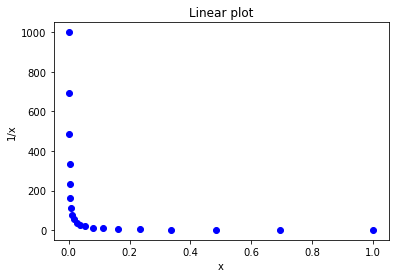

In [2]:
N = 20
x = np.logspace(-3,0,num=N)
plt.plot(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Linear plot")

Text(0.5, 1.0, 'Semi-log plot')

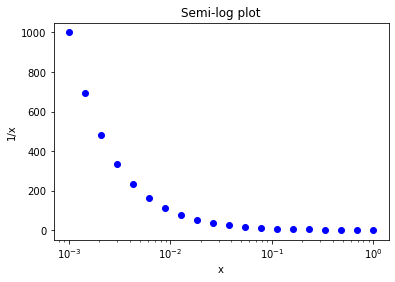

In [3]:
plt.semilogx(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Semi-log plot")

Text(0.5, 1.0, 'Log-log plot')

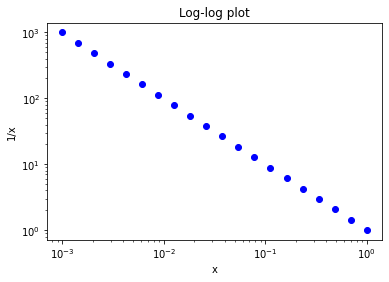

In [4]:
plt.loglog(x,1/x,'bo')
plt.xlabel("x")
plt.ylabel("1/x")
plt.title("Log-log plot")

The linear axes show the form of the function clearly (visually intuitive) but the compression of points is confusing.  The semi-log plot shows the form of the function reasonably clearly, but the 1/x form is distorted.  The log-log plot shows the data points most clearly, and is clear if the axes are carefully checked.

### Question 2

Text(0.5, 1.0, 'Archimedes spiral')

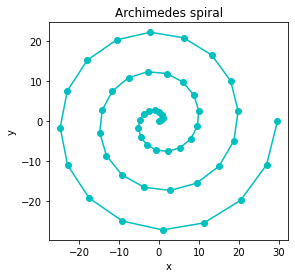

In [5]:
# Define parameters for Archimedes spiral, r = a + b theta
a = 0.0
b = 1./2*np.pi
theta = np.linspace(0,6*np.pi)
r = a + b*theta
x = r*np.cos(theta)
y = r*np.sin(theta)
plt.plot(x,y,'co-')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('scaled')
plt.title("Archimedes spiral")

Text(0.5, 1.0, 'Logarithmic spiral')

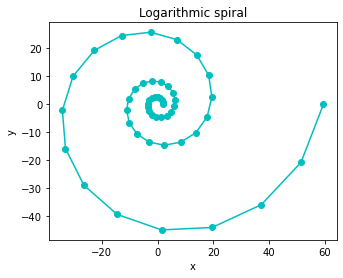

In [6]:
# Parameters for logarithmic spiral
a_log = 2
b_log = 0.18
r_log = a_log*np.exp(b_log*theta)
x_log = r_log*np.cos(theta)
y_log = r_log*np.sin(theta)
plt.plot(x_log,y_log,'co-')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('scaled')
plt.title("Logarithmic spiral")

For these plots, to be clearer visually we would benefit from the inverse of the usual logarithmic scale: we want fewer points near zero and more as theta increases.  The density of points you choose will always depend on the problem you are addressing.

### Question 3

Here is a simple implementation of the solution, which makes it clear how each point is located.  Note, however, that it does not use NumPy operations; a version which should be more efficient is below (though is maybe less obvious).

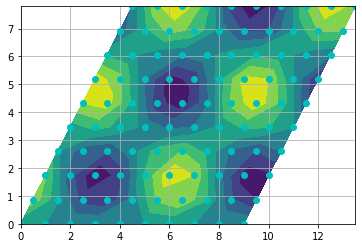

In [7]:
N_no = 10
avec = np.array((1,0))
bvec = np.array((0.5,0.5*np.sqrt(3)))
pos_nm = np.zeros((2,N_no,N_no))
for i in range(N_no):
    for j in range(N_no):
        pos_nm[:,i,j] = i*avec + j*bvec
surf = np.cos(pos_nm[0])*np.sin(pos_nm[1])
plt.contourf(pos_nm[0],pos_nm[1],surf)
plt.plot(pos_nm[0],pos_nm[1],'co')
plt.grid()

To use the full power of NumPy, we need `np.meshgrid` to create 2D arrays for the multiples of $\textbf{a}$ and $\textbf{b}$ vectors, and we then make an outer product between each of these and the basis vectors to create the array of grid points, using `np.outer`.

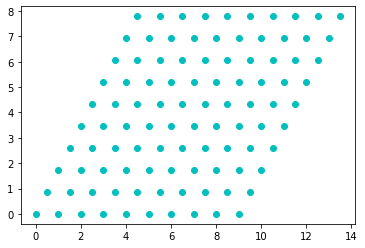

In [8]:
x_N = np.linspace(0,N_no-1,N_no)
# Arrays of a and b vectors
x_N_2d, y_N_2d = np.meshgrid(x_N,x_N)

# Note that you could create the points like this; this may be more obvious
#
#pos = np.zeros((2,N,N))
#pos[0] = avec[0]*x_N_2d + bvec[0]*y_N_2d
#pos[1] = avec[1]*x_N_2d + bvec[1]*y_N_2d
#
# However we can do the whole thing with one numpy command
#
# Outer product to form the grid
pos = np.outer(avec,x_N_2d) + np.outer(bvec,y_N_2d)
plt.plot(pos[0],pos[1],'co')

## 4. Differentiation

### Question 1

In [9]:
def centredFD(fun,x,dx):
    """Calculate centred first order finite-difference of given function
    Inputs:
    fun (function to be differentiated)
    x   
    dx  (finite difference)
    Returns:
    finite difference"""
    df = fun(x + dx) - fun(x - dx)
    return df/(2*dx)

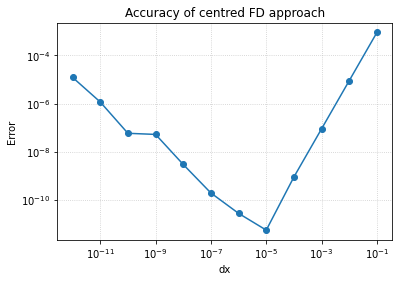

In [10]:
x = 1.0
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(centredFD(np.sin,x,dx) - np.cos(x))
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of centred FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

Notice how the error is smaller than for the forward FD approach, but that the overall accuracy decreases beyond a certain value of dx.  You can see that the error is second order from the gradient between $10^{-1}$ and $10^{-5}$.

#### Question 2

In [11]:
def d2f_cent(f,x,dx):
    """Implements the centred finite difference second derivative"""
    return (f(x + dx) - 2 * f(x) + f(x - dx)) / (dx * dx)

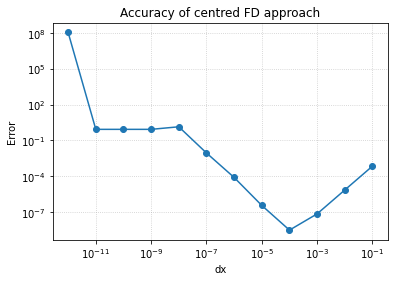

In [12]:
x = 1.0
N = 12
dx_array = np.logspace(-N,-1,N)
results = np.zeros(N)
for i, dx in enumerate(dx_array):
    results[i] = abs(d2f_cent(np.sin,x,dx) + np.sin(x))
plt.loglog(dx_array,results,'o-')
plt.grid(True,linestyle=':')
plt.xlabel('dx')
plt.ylabel('Error')
plt.title('Accuracy of centred FD approach')
plt.grid(True, alpha=0.7, linestyle=':', which='both', axis='both')

There are continuing issues with the accuracy and the value of dx here; the enormous error for dx=1e-12 must be related to rounding error.

#### Question 3

In [13]:
def fd_f(f,x,dx):
    """Implements forward finite difference"""
    return (f(x + dx) - f(x)) / dx

def fd_b(f,x,dx):
    """Implements backward finite difference"""
    return (f(x) - f(x - dx)) / dx

def fd_c(f,x,dx):
    """Implements centred finitd difference"""
    return (f(x + dx) - f(x - dx))/(2*dx)
def d2f_cent(f,x,dx):
    """Implements the centred finite difference second derivative"""
    return (f(x + dx) - 2 * f(x) + f(x - dx)) / (dx * dx)

In [14]:
x = 1.0
exact = -np.sin(x)
print(f"Exact second derivative at x is {exact}")
for dx in [0.1**i for i in range(1,6)]:
    second = d2f_cent(np.sin,x,dx)
    fd_f_f = (fd_f(np.sin,x+dx,dx) - fd_f(np.sin,x,dx))/dx
    fd_f_b = (fd_f(np.sin,x,dx) - fd_b(np.sin,x,dx))/dx
    fd_b_b = (fd_b(np.sin,x,dx) - fd_b(np.sin,x-dx,dx))/dx
    print(f"dx is {dx:.5f} second is {second:.6f}, ff is {fd_f_f:.6f}, fb is {fd_f_b:.6f}, bb is {fd_b_b:.6f}")

Exact second derivative at x is -0.8414709848078965
dx is 0.10000 second is -0.840770, ff is -0.890465, fb is -0.840770, bb is -0.782674
dx is 0.01000 second is -0.841464, ff is -0.846825, fb is -0.841464, bb is -0.836019
dx is 0.00100 second is -0.841471, ff is -0.842011, fb is -0.841471, bb is -0.840930
dx is 0.00010 second is -0.841471, ff is -0.841525, fb is -0.841471, bb is -0.841417
dx is 0.00001 second is -0.841471, ff is -0.841476, fb is -0.841471, bb is -0.841465


Notice that the centred second derivative (`second`) is the same as the combination of a forward and backward difference (`fb`); this formula appears to converge fastest.  But this is not quite right: the other two methods are evaluating the second derivative at $x + \Delta x$ and $x - \Delta x$ respectively, so the convergence is simply due to $\Delta x$ decreasing.

## 5. Integration

### Question 1

In [15]:
def simpson_int(f,a,b,N):
    """Implement integration using Simpson's rule
    Inputs:
    f    (function to be integrated)
    a, b (limits in integration)
    N    (number of points, must be even)
    Returns value of integral"""
    # End points
    integral= f(a) + f(b)
    dx = (b-a)/N
    for i in range(1,N,2): 
        integral += 4*f(a+i*dx)
    for i in range(2,N-1,2):
        integral += 2*f(a+i*dx)
    integral *= dx/3.0
    return integral

In [16]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)
print("Exact answer for integral of x cos(x) from 0 to 1 is ",np.cos(1)+np.sin(1)-1)
for i in [6,10,20,50,100,200,500,1000]:
    print(f"Integral of x cos(x) from 0 to 1 is {simpson_int(xcos,0,1,i):17.14f} with {i:4} points")

Exact answer for integral of x cos(x) from 0 to 1 is  0.38177329067603627
Integral of x cos(x) from 0 to 1 is  0.38178285423408 with    6 points
Integral of x cos(x) from 0 to 1 is  0.38177452640226 with   10 points
Integral of x cos(x) from 0 to 1 is  0.38177336781141 with   20 points
Integral of x cos(x) from 0 to 1 is  0.38177329265000 with   50 points
Integral of x cos(x) from 0 to 1 is  0.38177329079940 with  100 points
Integral of x cos(x) from 0 to 1 is  0.38177329068375 with  200 points
Integral of x cos(x) from 0 to 1 is  0.38177329067623 with  500 points
Integral of x cos(x) from 0 to 1 is  0.38177329067605 with 1000 points


Clearly, Simpson's rule is far better than the others; as it requires the *same* number of function evaluations, it is worth using every time.

#### Question 2

In [17]:
def integrate_2d(fun,x,y,dx,dy):
    """Perform simple 2D integration
    
    Inputs:
    fun    Function to be integrated
    x, y   2D arrays of points (e.g. from np.meshgrid)
    dx, dy Grid spacings
    """
    return dx*dy*np.sum(fun(x,y))

#### Question 3

In [18]:
def test_fun(x,y):
    """Test function to integrate"""
    return np.cos(x)*np.cos(y)
N = 1001
maxval = np.pi/4
x = np.linspace(0,maxval,N)
y = np.linspace(0,maxval,N)
delta = maxval/(N-1)
x2D, y2D = np.meshgrid(x,y)
print("Integral is: ", integrate_2d(test_fun,x2D,y2D,delta,delta))

Integral is:  0.500948457404405


I found that quite a small grid spacing (equivalently a large number of grid points) is needed to get an answer accurate to two decimal places.  The analytic answer is 0.5.

## 5.2 Library routines


#### Question 1

In [19]:
def xcos(x):
    """Calculate x*cos(x)"""
    return x*np.cos(x)

In [20]:
from scipy import integrate
integral1, err = integrate.quad(xcos,0,1)
print(f"Scipy quad gives {integral1} with estimated error {err}")

Scipy quad gives 0.3817732906760362 with estimated error 4.23853497495448e-15


In [21]:
def xcosa(x,a):
    """Calculate x*cos(a*x)"""
    return x*np.cos(a*x)
integral2, err = integrate.quad(xcosa,0,1,args=(1.0))
print(f"Scipy quad gives {integral2} with estimated error {err}")

Scipy quad gives 0.3817732906760362 with estimated error 4.23853497495448e-15
